In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset2.csv')

In [2]:
dataset.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING

###THIS SECTION IS DATASET SPECIFIC PROCESSING


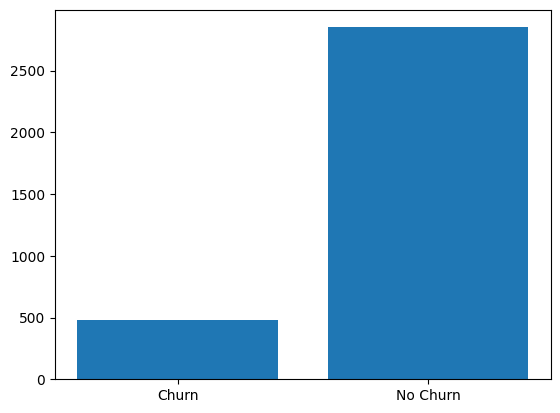

In [4]:
from pre_processor import PreProcessor


label_column = 'Churn'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [5]:
binary_encode_columns=[]
one_hot_encode_columns=[]
ordinal_encode_columns=[]
scaling_columns=[column for column in dataset.columns if column != label_column]


In [6]:
scaling_columns

['AccountWeeks',
 'ContractRenewal',
 'DataPlan',
 'DataUsage',
 'CustServCalls',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [7]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

In [8]:
pre_processor.dataset

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,churn
0,0.676489,0.327580,1.617086,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,0.0
1,0.149065,0.327580,1.617086,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,0.0
2,0.902529,0.327580,-0.618396,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,0.0
3,-0.428590,-3.052685,-0.618396,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0.0
4,-0.654629,-3.052685,-0.618396,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5695,-0.704860,0.327580,-0.618396,-0.641642,-0.427932,0.698227,-0.470229,-0.018581,0.385950,0.022464,1.0
5696,0.450450,-3.052685,1.617086,1.205150,2.613214,-0.363118,-0.270887,0.803409,0.169016,-0.550721,1.0
5697,0.576028,0.327580,-0.618396,-0.641642,1.852927,-0.669769,0.974997,-0.749238,0.587107,-0.873137,1.0
5698,-1.558785,0.327580,-0.618396,-0.641642,-0.427932,2.123147,1.274009,0.833853,0.614717,0.452353,1.0


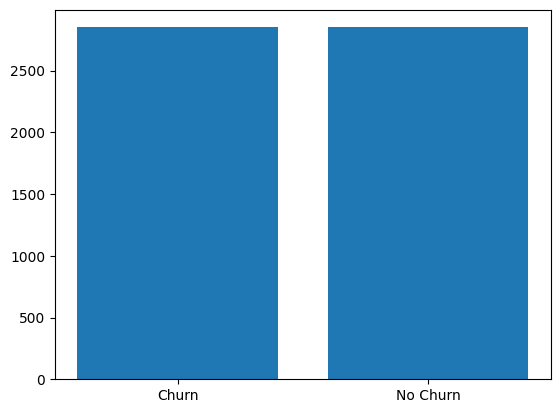

In [9]:
pre_processor.plot_imbalance()

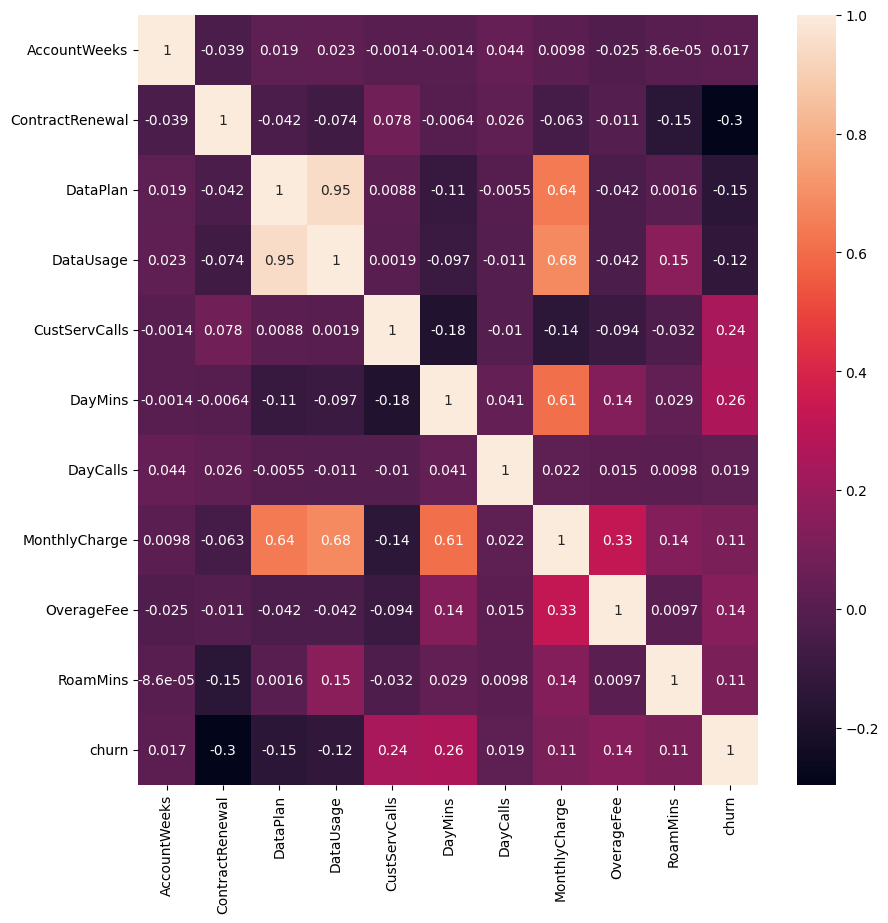

In [10]:
pre_processor.plot_correlation()

In [11]:
pre_processor.dataset.drop(columns=['DataUsage'],inplace=True)

In [12]:
pre_processor.calculate_feature_importance()

,importance
DayMins,0.191126
CustServCalls,0.172774
MonthlyCharge,0.161390
ContractRenewal,0.117220
OverageFee,0.097255
RoamMins,0.078992
DayCalls,0.069598
AccountWeeks,0.064589
DataPlan,0.047057


In [13]:
pre_processor.remove_features_by_importance(0.00)

In [14]:
pre_processor.split_features_labels()

In [15]:
pre_processor.calculate_feature_importance()

,importance
DayMins,0.195387
CustServCalls,0.174527
MonthlyCharge,0.155399
ContractRenewal,0.112819
OverageFee,0.098499
RoamMins,0.079933
AccountWeeks,0.067982
DayCalls,0.066068
DataPlan,0.049385


In [16]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [17]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=5)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)


In [18]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=10)

[I 2024-06-11 12:48:19,643] A new study created in memory with name: no-name-eed9078a-7eb9-4b04-b61c-1ca17f609a56
[I 2024-06-11 12:48:23,103] Trial 0 finished with value: 0.8870614035087719 and parameters: {'n_estimators': 183, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.8870614035087719.
[I 2024-06-11 12:48:24,702] Trial 1 finished with value: 0.8839912280701755 and parameters: {'n_estimators': 90, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.8870614035087719.
[I 2024-06-11 12:48:27,630] Trial 2 finished with value: 0.9160087719298247 and parameters: {'n_estimators': 143, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.9160087719298247.
[I 2024-06-11 12:48:29,549] Trial 3 finished with value: 0.856359649122807 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 14}. Best is trial 2 with valu

In [19]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       589
         1.0       0.97      1.00      0.98       551

    accuracy                           0.98      1140
   macro avg       0.98      0.98      0.98      1140
weighted avg       0.98      0.98      0.98      1140

Neural Network
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       589
         1.0       0.84      0.88      0.86       551

    accuracy                           0.86      1140
   macro avg       0.86      0.86      0.86      1140
weighted avg       0.86      0.86      0.86      1140

Gradient Boosting
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       589
         1.0       0.97      1.00      0.98       551

    accuracy                           0.99      1140
   macro avg       0.99      0.99      0.99      1140
weighted avg       0.99    

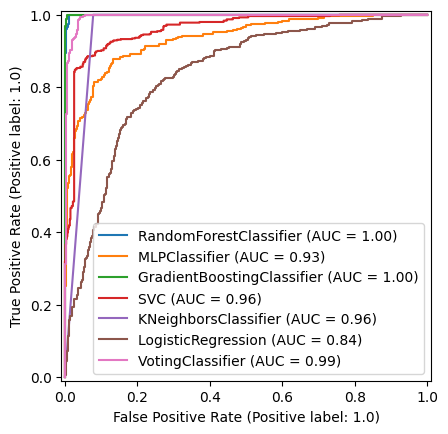

In [20]:
model_select.roc_curve()

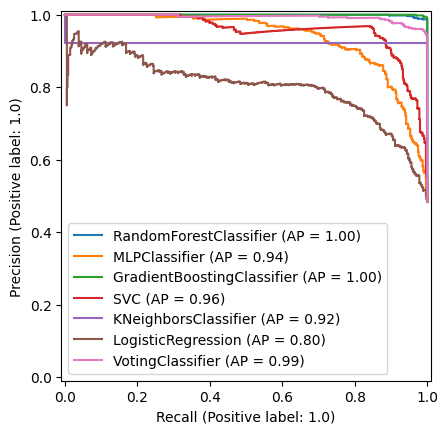

In [21]:
model_select.precision_recall_curve()

In [22]:
model_select.roc_plot.figure.savefig('images/roc_plot2.png')
model_select.pr_plot.figure.savefig('images/pr_plot2.png')